In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("# CREATING A TEST IMAGE")

test_image = np.zeros((64, 64), dtype=np.uint8)
print("Image shape:", test_image.shape)

# CREATING A TEST IMAGE
Image shape: (64, 64)


In [2]:
print("First few pixels:")
print(test_image[0:3, 0:3])

First few pixels:
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [3]:
print("We're drawing a WHITE SQUARE from (20,20) to (39,39)")

test_image[20:40, 20:40] = 255

We're drawing a WHITE SQUARE from (20,20) to (39,39)


In [4]:
print("Pixels from 18 to 21:")

print(test_image[18:22, 18:22])

Pixels from 18 to 21:
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0 255 255]
 [  0   0 255 255]]


Displaying the Image:


Text(0.5, 1.0, 'Our Test Image: (Black background + White square)')

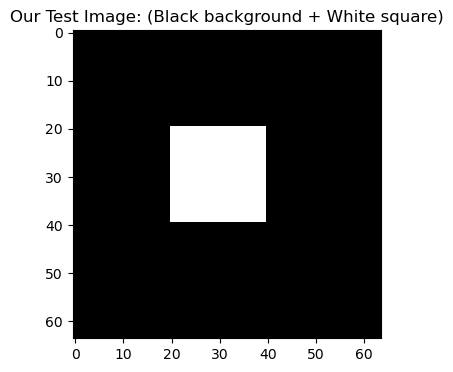

In [5]:
print("Displaying the Image:")

# Create a figure with 1 row and 2 columns of subplots
# Think of it as having 2 picture frames side by side
plt.figure(figsize=(10, 4))

# First subplot - Original image
plt.subplot(1, 2, 1)  # (1 row, 2 columns, position 1)
plt.imshow(test_image, cmap='gray')  # Display as grayscale
plt.title('Our Test Image: (Black background + White square)')

In [6]:
# Add pixel values to understand what we're seeing
for i in range(18, 22):      # Show rows 18-21
    for j in range(18, 22):  # Show columns 18-21
        plt.text(j, i, f'{test_image[i, j]}', 
                ha='center', va='center', 
                color='red' if test_image[i, j] == 0 else 'black',
                fontsize=8)

In [7]:
# APPLYING DCT
# Convert image to float32 - DCT needs floating point numbers
# Our image was uint8 (0-255 integers), but DCT works with decimals
image_float = test_image.astype(np.float32)

print("Converted image to float32 for DCT processing")
print("Sample pixels after conversion:")
print(image_float[18:22, 18:22])

Converted image to float32 for DCT processing
Sample pixels after conversion:
[[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0. 255. 255.]
 [  0.   0. 255. 255.]]


In [8]:
# Apply DCT
# cv2.dct() takes spatial domain image → frequency domain coefficients

dct_coefficients = cv2.dct(image_float)

print("DCT APPLIED SUCCESSFULLY!")
print("Image converted from SPATIAL → FREQUENCY domain")
print("DCT coefficients shape:", dct_coefficients.shape)
print("First 8x8 DCT coefficients:")
print(dct_coefficients[0:11, 0:11].round(2))  # Show first 8x8, rounded to 2 decimals

DCT APPLIED SUCCESSFULLY!
Image converted from SPATIAL → FREQUENCY domain
DCT coefficients shape: (64, 64)
First 8x8 DCT coefficients:
[[ 1593.75   212.18 -1872.97  -442.55   981.37   275.32  -124.59   121.39
   -288.83  -380.48   252.72]
 [  212.18    28.25  -249.35   -58.92   130.65    36.65   -16.59    16.16
    -38.45   -50.65    33.65]
 [-1872.97  -249.35  2201.1    520.08 -1153.3   -323.55   146.41  -142.66
    339.43   447.14  -297.  ]
 [ -442.55   -58.92   520.08   122.89  -272.51   -76.45    34.59   -33.71
     80.2    105.65   -70.18]
 [  981.37   130.65 -1153.3   -272.51   604.29   169.53   -76.72    74.75
   -177.85  -234.28   155.62]
 [  275.32    36.65  -323.55   -76.45   169.53    47.56   -21.52    20.97
    -49.89   -65.73    43.66]
 [ -124.59   -16.59   146.41    34.59   -76.72   -21.52     9.74    -9.49
     22.58    29.74   -19.76]
 [  121.39    16.16  -142.66   -33.71    74.75    20.97    -9.49     9.25
    -22.     -28.98    19.25]
 [ -288.83   -38.45   339.43    8

In [9]:
print("UNDERSTANDING DCT COEFFICIENTS")

print("KEY POINTS ABOUT DCT COEFFICIENTS:")
print("1. Top-left [0,0]: DC coefficient = Average brightness of whole image")
print(f"   Our DC coefficient: {dct_coefficients[0,0]:.2f}")
print("2. Other coefficients: AC coefficients = Patterns and edges")
print("3. Moving away from top-left = Higher frequencies (finer details)")
print("4. Many coefficients are near ZERO (less important for the image)")

UNDERSTANDING DCT COEFFICIENTS
KEY POINTS ABOUT DCT COEFFICIENTS:
1. Top-left [0,0]: DC coefficient = Average brightness of whole image
   Our DC coefficient: 1593.75
2. Other coefficients: AC coefficients = Patterns and edges
3. Moving away from top-left = Higher frequencies (finer details)
4. Many coefficients are near ZERO (less important for the image)


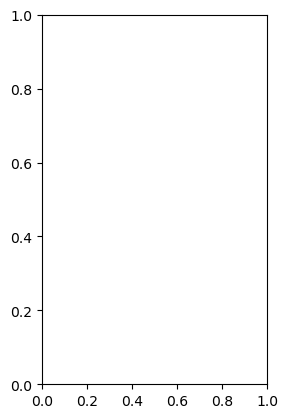

In [10]:
# Display DCT coefficients
plt.subplot(1, 2, 2)  # Second subplot position

# We use log scale because DCT values can be very large/small
# abs() takes absolute values, log() compresses the range, +1 avoids log(0)
dct_display = np.log(abs(dct_coefficients) + 1)

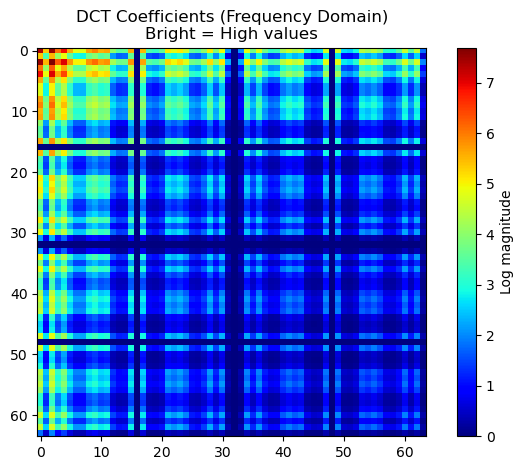

In [11]:
plt.imshow(dct_display, cmap='jet')
plt.title('DCT Coefficients (Frequency Domain)\nBright = High values')
plt.colorbar(label='Log magnitude')
plt.tight_layout()
plt.show()

In [12]:
dct_watermarked = dct_coefficients.copy()

In [13]:
# Why [10,10]? It's far enough from DC to be mid-frequency, not too far to be high-frequency

original_value = dct_watermarked[10, 10]
print(original_value)
dct_watermarked[10, 10] += 50  # Add 50 to this coefficient

40.075066


In [14]:
print(f"Modified coefficient [10,10]:")
print(f"  Before: {original_value:.2f}")
print(f"  After:  {dct_watermarked[10, 10]:.2f}")
print(f"  Change: +50.00")
print("This is like adding a secret signature to the image!")


Modified coefficient [10,10]:
  Before: 40.08
  After:  90.08
  Change: +50.00
This is like adding a secret signature to the image!


In [15]:
## What Changes:
# Every pixel in the image changes slightly (by 0.1-2 units out of 255)
# A specific texture pattern is added throughout the entire image
#The mathematical frequency representation changes

## What Stays the Same:
# File size - Same number of pixels, same data storage
# Visual appearance - Changes are invisible to human eyes (PSNR > 40dB)
# Image dimensions & format - No structural changes
# Overall brightness/contrast - Virtually unchanged

In [16]:

print("CONVERTING BACK TO IMAGE DOMAIN")

# Inverse DCT - converts frequency domain back to spatial domain
# cv2.idct() does the opposite of cv2.dct()
watermarked_image = cv2.idct(dct_watermarked)

# Convert back to 0-255 range and integer type
watermarked_image = np.uint8(np.clip(watermarked_image, 0, 255))
print(watermarked_image[0:3, 0:3])
print("Applied Inverse DCT - back to spatial domain!")
print("Watermarked image created successfully")

CONVERTING BACK TO IMAGE DOMAIN
[[1 1 0]
 [1 0 0]
 [0 0 0]]
Applied Inverse DCT - back to spatial domain!
Watermarked image created successfully


In [17]:
print("COMPARING ORIGINAL VS WATERMARKED")

# Calculate difference
difference = watermarked_image.astype(float) - test_image.astype(float)
max_change = np.max(np.abs(difference))

print(f"Maximum change between original and watermarked: {max_change} pixels")
print("This shows how subtle the watermark is!")

COMPARING ORIGINAL VS WATERMARKED
Maximum change between original and watermarked: 2.0 pixels
This shows how subtle the watermark is!


In [18]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Original Image')

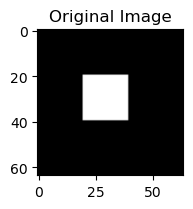

In [34]:
# Original
plt.subplot(1, 3, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Watermarked Image\n(Looks identical to human eyes)')

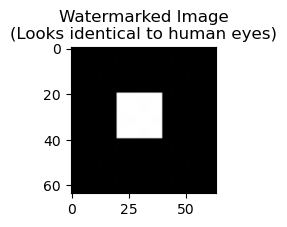

In [35]:
# Watermarked  
plt.subplot(1, 3, 2)
plt.imshow(watermarked_image, cmap='gray')
plt.title('Watermarked Image\n(Looks identical to human eyes)')

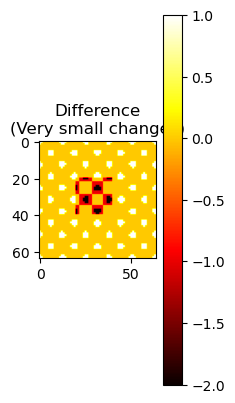

In [36]:
# Difference
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='hot')
plt.title('Difference\n(Very small changes)')
plt.colorbar()

In [37]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>